# COLAB 한글깨짐 방지

In [417]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [418]:
# 상단의 [런타임 - 런타임 다시 시작] 을 클릭하여 런타임을 재시작합니다.

In [419]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 실제 데이터 : 온라인 학습 엑셀 데이터 읽어오기

In [420]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
np.random.seed(41)

In [421]:
!ls -al /content/drive/MyDrive/

total 328288
-rw------- 1 root root 34431677 Jan 17 02:27 '온라인 학습 데이트_2021_10월-12월_4Q.csv'
-rw------- 1 root root 13101785 Dec 21 09:37 '온라인 학습 데이트_2021_10월-12월.xlsx'
-rw------- 1 root root 37228165 Jan 17 02:27 '온라인 학습 데이트_2021_1월-3월_1Q.csv'
-rw------- 1 root root 14350942 Dec 21 09:36 '온라인 학습 데이트_2021_1월-3월.xlsx'
-rw------- 1 root root 43239058 Jan 17 02:27 '온라인 학습 데이트_2021_4월-6월_2Q.csv'
-rw------- 1 root root 17046149 Dec 21 09:36 '온라인 학습 데이트_2021_4월-6월.xlsx'
-rw------- 1 root root 45059913 Jan 17 02:27 '온라인 학습 데이트_2021_7월-9월_3Q.csv'
-rw------- 1 root root 16324314 Dec 21 09:36 '온라인 학습 데이트_2021_7월-9월.xlsx'
-rw------- 1 root root  1303292 Jan 13 01:04  ansan_data_toEucKR.csv
drwx------ 2 root root     4096 Sep  1  2020 'Colab Notebooks'
-rw------- 1 root root 47236400 Aug 20 04:48 'Python활용AI모델링_05.머신러닝 모델링_V4.2_오윤우.pptx'
-rw------- 1

# 재가공 데이터 : 처음이라 생각하고 데이터 파일 읽어 들이자

In [422]:
df_1Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_1월-3월_1Q.csv', encoding='cp949')
df_2Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_4월-6월_2Q.csv', encoding='cp949')
df_3Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_7월-9월_3Q.csv', encoding='cp949')
df_4Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_10월-12월_4Q.csv', encoding='cp949')

In [423]:
print(df_1Q.shape)
print(df_2Q.shape)
print(df_3Q.shape)
print(df_4Q.shape)

(189516, 18)
(235732, 18)
(213501, 18)
(160051, 18)


In [424]:
df_1Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189516 entries, 0 to 189515
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   교육분야1차      189516 non-null  object 
 1   교육분야2차      189516 non-null  object 
 2   과정코드        189516 non-null  int64  
 3   과정명(학습명)    189516 non-null  object 
 4   과정등록일(생성일)  184041 non-null  object 
 5   학습시작일       189516 non-null  object 
 6   학습종료일       189516 non-null  object 
 7   사번(ID)      189516 non-null  object 
 8   소속부서        189516 non-null  object 
 9   호칭          189516 non-null  object 
 10  직무          189516 non-null  object 
 11  제작/소싱       42300 non-null   object 
 12  자격증보유여부     189516 non-null  object 
 13  학습지수        189280 non-null  float64
 14  과정코드비율      189516 non-null  float64
 15  경력개월수       189516 non-null  float64
 16  어학점수        189516 non-null  float64
 17  수강횟수        189516 non-null  float64
dtypes: float64(5), int64(1), object(12)
memory u

In [425]:
df_2Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235732 entries, 0 to 235731
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   교육분야1차      235732 non-null  object 
 1   교육분야2차      235732 non-null  object 
 2   과정코드        235732 non-null  int64  
 3   과정명(학습명)    235732 non-null  object 
 4   과정등록일(생성일)  3837 non-null    object 
 5   학습시작일       235732 non-null  object 
 6   학습종료일       235732 non-null  object 
 7   사번(ID)      235732 non-null  object 
 8   소속부서        235732 non-null  object 
 9   호칭          235732 non-null  object 
 10  직무          235732 non-null  object 
 11  제작/소싱       55766 non-null   object 
 12  자격증보유여부     235732 non-null  object 
 13  학습지수        235449 non-null  float64
 14  과정코드비율      235732 non-null  float64
 15  경력개월수       235732 non-null  float64
 16  어학점수        235732 non-null  float64
 17  수강횟수        235732 non-null  float64
dtypes: float64(5), int64(1), object(12)
memory u

In [426]:
df_3Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213501 entries, 0 to 213500
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   교육분야1차      213501 non-null  object 
 1   교육분야2차      213501 non-null  object 
 2   과정코드        213501 non-null  int64  
 3   과정명(학습명)    213501 non-null  object 
 4   과정등록일(생성일)  213501 non-null  object 
 5   학습시작일       213501 non-null  object 
 6   학습종료일       213501 non-null  object 
 7   사번(ID)      213501 non-null  object 
 8   소속부서        213501 non-null  object 
 9   호칭          213501 non-null  object 
 10  직무          213501 non-null  object 
 11  제작/소싱       52215 non-null   object 
 12  자격증보유여부     213501 non-null  object 
 13  학습지수        213220 non-null  float64
 14  과정코드비율      213501 non-null  float64
 15  경력개월수       213501 non-null  float64
 16  어학점수        213501 non-null  float64
 17  수강횟수        213501 non-null  float64
dtypes: float64(5), int64(1), object(12)
memory u

In [427]:
df_4Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160051 entries, 0 to 160050
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   교육분야1차      160051 non-null  object 
 1   교육분야2차      160051 non-null  object 
 2   과정코드        160051 non-null  int64  
 3   과정명(학습명)    160051 non-null  object 
 4   과정등록일(생성일)  160051 non-null  object 
 5   학습시작일       160051 non-null  object 
 6   학습종료일       160051 non-null  object 
 7   사번(ID)      160051 non-null  object 
 8   소속부서        160051 non-null  object 
 9   호칭          160051 non-null  object 
 10  직무          160051 non-null  object 
 11  제작/소싱       66683 non-null   object 
 12  자격증보유여부     160051 non-null  object 
 13  학습지수        159842 non-null  float64
 14  과정코드비율      160051 non-null  float64
 15  경력개월수       160051 non-null  float64
 16  어학점수        160051 non-null  float64
 17  수강횟수        160051 non-null  float64
dtypes: float64(5), int64(1), object(12)
memory u

In [428]:
df_Q = pd.concat([df_1Q, df_2Q, df_3Q, df_4Q], axis=0)

In [429]:
192703 + 236263 + 215125 + 160622 

804713

In [430]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   교육분야1차      798800 non-null  object 
 1   교육분야2차      798800 non-null  object 
 2   과정코드        798800 non-null  int64  
 3   과정명(학습명)    798800 non-null  object 
 4   과정등록일(생성일)  561430 non-null  object 
 5   학습시작일       798800 non-null  object 
 6   학습종료일       798800 non-null  object 
 7   사번(ID)      798800 non-null  object 
 8   소속부서        798800 non-null  object 
 9   호칭          798800 non-null  object 
 10  직무          798800 non-null  object 
 11  제작/소싱       216964 non-null  object 
 12  자격증보유여부     798800 non-null  object 
 13  학습지수        797791 non-null  float64
 14  과정코드비율      798800 non-null  float64
 15  경력개월수       798800 non-null  float64
 16  어학점수        798800 non-null  float64
 17  수강횟수        798800 non-null  float64
dtypes: float64(5), int64(1), object(12)
memory u

In [431]:
df_Q.isnull().sum()

교육분야1차             0
교육분야2차             0
과정코드               0
과정명(학습명)           0
과정등록일(생성일)    237370
학습시작일              0
학습종료일              0
사번(ID)             0
소속부서               0
호칭                 0
직무                 0
제작/소싱         581836
자격증보유여부            0
학습지수            1009
과정코드비율             0
경력개월수              0
어학점수               0
수강횟수               0
dtype: int64

# 시간대별 학습 발췌을 위해 작업 수행
- 학습시작일, 학습종료일 : datetime으로 타입 변환
- 학습시작일, 학습종료일 : time 분리
- 요일 분리
- 과정코드 string 변경하기
- 학습 시간을 초단위로 변경


In [432]:
df_Q['학습시작일'] = pd.to_datetime(df_Q['학습시작일'])
df_Q['학습종료일'] = pd.to_datetime(df_Q['학습종료일'])

In [433]:
df_Q['학습시작일_TIME'] = df_Q['학습시작일'].dt.time
df_Q['학습종료일_TIME'] = df_Q['학습종료일'].dt.time

In [434]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   교육분야1차      798800 non-null  object        
 1   교육분야2차      798800 non-null  object        
 2   과정코드        798800 non-null  int64         
 3   과정명(학습명)    798800 non-null  object        
 4   과정등록일(생성일)  561430 non-null  object        
 5   학습시작일       798800 non-null  datetime64[ns]
 6   학습종료일       798800 non-null  datetime64[ns]
 7   사번(ID)      798800 non-null  object        
 8   소속부서        798800 non-null  object        
 9   호칭          798800 non-null  object        
 10  직무          798800 non-null  object        
 11  제작/소싱       216964 non-null  object        
 12  자격증보유여부     798800 non-null  object        
 13  학습지수        797791 non-null  float64       
 14  과정코드비율      798800 non-null  float64       
 15  경력개월수       798800 non-null  float64       
 16  어학

In [435]:
df_Q['학습요일'] = df_Q['학습시작일'].dt.weekday

In [436]:
df_Q['학습요일']

0         4
1         4
2         4
3         4
4         4
         ..
160046    0
160047    0
160048    0
160049    0
160050    0
Name: 학습요일, Length: 798800, dtype: int64

In [437]:
conv = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df_Q['학습요일_CONV'] = df_Q['학습요일'].map(conv)

In [438]:
df_Q['학습요일_CONV'].value_counts()

금    154164
화    152969
목    149903
월    140875
수    139942
토     30506
일     30441
Name: 학습요일_CONV, dtype: int64

In [439]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   교육분야1차      798800 non-null  object        
 1   교육분야2차      798800 non-null  object        
 2   과정코드        798800 non-null  int64         
 3   과정명(학습명)    798800 non-null  object        
 4   과정등록일(생성일)  561430 non-null  object        
 5   학습시작일       798800 non-null  datetime64[ns]
 6   학습종료일       798800 non-null  datetime64[ns]
 7   사번(ID)      798800 non-null  object        
 8   소속부서        798800 non-null  object        
 9   호칭          798800 non-null  object        
 10  직무          798800 non-null  object        
 11  제작/소싱       216964 non-null  object        
 12  자격증보유여부     798800 non-null  object        
 13  학습지수        797791 non-null  float64       
 14  과정코드비율      798800 non-null  float64       
 15  경력개월수       798800 non-null  float64       
 16  어학

### 과정코드 string 변경하기

In [440]:
df_Q['과정코드'] = df_Q['과정코드'].astype(str)

### 학습 시간을 초단위로 변경

In [441]:
df_Q['학습시간'] = df_Q['학습종료일'] - df_Q['학습시작일']

In [442]:
# 학습 시간을 초단위로 변경
df_Q['학습시간'] = np.round(df_Q['학습시간'].dt.total_seconds())

In [443]:
df_Q['학습시간']

0         51080.0
1         80443.0
2           184.0
3           638.0
4           253.0
           ...   
160046      350.0
160047     1051.0
160048      233.0
160049      822.0
160050     2317.0
Name: 학습시간, Length: 798800, dtype: float64

# [직급기준] 
- 가장 많이 학습한 콘텐츠 교육분야1차
- 요일별 학습량 분석: 월/화/수/목/금/토/일

### 가장 많이 학습한 콘텐츠 교육분야1차

In [444]:
df_Q['교육분야1차'].value_counts()

DX         295837
경영지원        77211
네트워크        74201
일하는 방식      70889
영업/마케팅      46335
B2B         42338
그룹사         39568
OSP         39001
고객발자기혁신     32520
경영전략        29839
리더십         29526
IT          21535
Name: 교육분야1차, dtype: int64

In [445]:
df_Q.groupby(['호칭', '교육분야1차'])

In [446]:
df_Q.groupby(['호칭', '교육분야1차'])[['과정코드']].count()

과정코드
호칭 교육분야1차       
과장 B2B      8372
   DX      59190
   IT       4403
   OSP      7754
   경영전략     5977
...          ...
차장 그룹사      6040
   네트워크    11020
   리더십      4374
   영업/마케팅   6967
   일하는 방식  10668

[72 rows x 1 columns]

In [447]:
df_Q.groupby(['호칭', '교육분야1차'])[['과정코드']].count().sort_values(by=['호칭', '과정코드'], ascending=[True, False])

과정코드
호칭 교육분야1차        
과장 DX       59190
   경영지원     15299
   네트워크     14687
   일하는 방식   14280
   영업/마케팅    9195
...           ...
차장 OSP       5873
   고객발자기혁신   4772
   경영전략      4457
   리더십       4374
   IT        3342

[72 rows x 1 columns]

### 요일별 학습량 분석: 월/화/수/목/금/토/일

In [448]:
df_Q['학습요일_CONV'].value_counts()

금    154164
화    152969
목    149903
월    140875
수    139942
토     30506
일     30441
Name: 학습요일_CONV, dtype: int64

In [449]:
df_Q.groupby(['호칭', '학습요일_CONV'])

In [450]:
df_Q.groupby(['호칭', '학습요일_CONV'])[['과정코드']].count()

과정코드
호칭 학습요일_CONV       
과장 금          30859
   목          29675
   수          27994
   월          27976
   일           6185
   토           6115
   화          30636
대리 금          38306
   목          37767
   수          35097
   월          34864
   일           7532
   토           7763
   화          38342
부장 금          15496
   목          14992
   수          13979
   월          14113
   일           3016
   토           3019
   화          15166
사원 금          38621
   목          37256
   수          34921
   월          35512
   일           7723
   토           7575
   화          38102
임원 금           7724
   목           7540
   수           6987
   월           7211
   일           1495
   토           1522
   화           7671
차장 금          23158
   목          22673
   수          20964
   월          21199
   일           4490
   토           4512
   화          23052

In [451]:
df_Q.groupby(['호칭', '학습요일_CONV'])[['과정코드']].count().sort_values(by=['호칭', '과정코드'], ascending=[True, False])

과정코드
호칭 학습요일_CONV       
과장 금          30859
   화          30636
   목          29675
   수          27994
   월          27976
   일           6185
   토           6115
대리 화          38342
   금          38306
   목          37767
   수          35097
   월          34864
   토           7763
   일           7532
부장 금          15496
   화          15166
   목          14992
   월          14113
   수          13979
   토           3019
   일           3016
사원 금          38621
   화          38102
   목          37256
   월          35512
   수          34921
   일           7723
   토           7575
임원 금           7724
   화           7671
   목           7540
   월           7211
   수           6987
   토           1522
   일           1495
차장 금          23158
   화          23052
   목          22673
   월          21199
   수          20964
   토           4512
   일           4490

# 과정명에서 가장 많이 발생하는 단어 알아보기

## 불필요한 숫자, 단어 제거 

In [452]:
subject = df_Q[['과정코드', '과정명(학습명)']]
subject.head()

,과정코드,과정명(학습명)
0,100008519,K에듀 상품 바로 알기 3편형 영상 상품
1,100007873,트러블슈팅리모컨
2,100008091,코드 활용 광선번 관리(-)
3,100009868,기가(홈매니저)
4,100008194,공유기 셋팅방법


In [453]:
import re

subject['과정명(학습명)'] = subject['과정명(학습명)'].apply(lambda x : re.sub(r'\d+','', x))
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('및','')
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('편','')
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('위한','')

In [454]:
subject.head()

,과정코드,과정명(학습명)
0,100008519,K에듀 상품 바로 알기 형 영상 상품
1,100007873,트러블슈팅리모컨
2,100008091,코드 활용 광선번 관리(-)
3,100009868,기가(홈매니저)
4,100008194,공유기 셋팅방법


In [455]:
SENTENCE_LIST = subject['과정명(학습명)'].values
SENTENCE_LIST[:5]

array(['K에듀 상품 바로 알기 형 영상 상품', '트러블슈팅리모컨', '코드 활용 광선번 관리(-)', '기가(홈매니저)',
       '공유기 셋팅방법'], dtype=object)

In [456]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행해야 합니다
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(SENTENCE_LIST)

In [457]:
# 각 단어에 고유한 정수가 부여 확인
print(tokenizer.word_index)

{'ai': 1, '이해': 2, 'k에듀': 3, 'ai이해': 4, '자산화': 5, '전문지식': 6, '데이터': 7, 'rpa': 8, '모델링': 9, '클라우드': 10, 'ai로': 11, '알아보는': 12, 'k에듀의': 13, '주요': 14, 'ai기술': 15, '상품': 16, '컴플라이언스': 17, '딥러닝': 18, '현장훈련': 19, '업무': 20, '나의': 21, '미니인터뷰': 22, '파이썬기초': 23, '해지는': 24, '미니강좌': 25, '자동화': 26, '고객발자기혁신': 27, '머신러닝': 28, '강': 29, '사례': 30, '체험': 31, '국사온라인': 32, '해보기': 33, '이해하기': 34, '에센스': 35, '실전': 36, '비대면': 37, '성과관리를': 38, '목표수립': 39, '예측': 40, '알기': 41, '바로': 42, '프로세스': 43, '년': 44, '시각화': 45, '가이드': 46, '직원용': 47, '활용': 48, '방법': 49, '왜': 50, '부패방지': 51, '이유': 52, '직원': 53, '기초': 54, '알고리즘': 55, '육성코칭법': 56, '사업': 57, '매뉴얼': 58, '디지털': 59, '의': 60, '개요': 61, '되는': 62, '입찰': 63, '머신러닝과': 64, 'ai정의': 65, '파이썬전처리': 66, '전략': 67, '과정': 68, '분석': 69, '기본개념': 70, '기능': 71, '고객': 72, '교시': 73, '차시': 74, '네트워크': 75, '고객센터': 76, '관련': 77, 'ai업무적용사례': 78, '기술전문': 79, '파이썬판다스': 80, '업무적용': 81, '만들기': 82, '방지': 83, '교육': 84, '프리미어': 85, 'k에듀그룹': 86, 'rpa로': 87, '통한': 88, '실습': 89, '스마트팩토리': 90, '현

In [458]:
# 각 단어 갯수 순으로 정렬
sorted(tokenizer.word_counts.items(), key=lambda x : x[1], reverse=True)[:10]

[('ai', 62144),
 ('이해', 44574),
 ('k에듀', 43270),
 ('ai이해', 31514),
 ('자산화', 29734),
 ('전문지식', 29703),
 ('데이터', 27843),
 ('rpa', 22898),
 ('모델링', 20539),
 ('클라우드', 20523)]

# IT분야 데이터만 분리하기
- 교육분야1차: IT

### Boolean Index

In [459]:
df_Q['교육분야1차'] == 'IT'

0         False
1         False
2         False
3         False
4         False
          ...  
160046    False
160047    False
160048    False
160049    False
160050    False
Name: 교육분야1차, Length: 798800, dtype: bool

In [460]:
cond1 = (df_Q['교육분야1차'] == 'IT')
cond1

0         False
1         False
2         False
3         False
4         False
          ...  
160046    False
160047    False
160048    False
160049    False
160050    False
Name: 교육분야1차, Length: 798800, dtype: bool

In [461]:
df_IT_Q = df_Q[cond1]
df_IT_Q[['교육분야1차', '호칭']].head(3)

,교육분야1차,호칭
741,IT,사원
853,IT,대리
889,IT,사원


In [462]:
df_IT_Q .reset_index(drop=True, inplace=True)
df_IT_Q[['교육분야1차', '호칭']].head(3)

,교육분야1차,호칭
0,IT,사원
1,IT,대리
2,IT,사원


In [463]:
df_IT_Q.shape

(21535, 23)

In [464]:
df_IT_Q.head(3)

,교육분야1차,교육분야2차,과정코드,과정명(학습명),과정등록일(생성일),학습시작일,학습종료일,사번(ID),소속부서,호칭,직무,제작/소싱,자격증보유여부,학습지수,과정코드비율,경력개월수,어학점수,수강횟수,학습시작일_TIME,학습종료일_TIME,학습요일,학습요일_CONV,학습시간
0,IT,it,200000890,K에듀 임직원 정보보안 생활백서,2020-11-23 18:52:31.0,2021-01-03 19:25:32,2021-01-03 19:27:35,6100410106,기타,사원,영업,NaN,N,51.0,43.259518,56.0,808.0,2.0,19:25:32,19:27:35,6,일,123.0
1,IT,it,100008024,RPA실습하기,2018-07-17 13:26:04.0,2021-01-04 08:31:52,2021-01-04 08:34:07,3820059936,전남,대리,HR,NaN,N,70.0,23.852305,128.0,906.0,1.0,08:31:52,08:34:07,0,월,135.0
2,IT,it,200000516,1 전환 가입자 예측 모델 만들기,2020-11-12 09:19:45.0,2021-01-04 08:52:03,2021-01-04 14:01:08,9100099099,기타,사원,HR,NaN,N,75.0,71.629759,124.0,730.0,7.0,08:52:03,14:01:08,0,월,18545.0


In [465]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21535 entries, 0 to 21534
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   교육분야1차      21535 non-null  object        
 1   교육분야2차      21535 non-null  object        
 2   과정코드        21535 non-null  object        
 3   과정명(학습명)    21535 non-null  object        
 4   과정등록일(생성일)  12731 non-null  object        
 5   학습시작일       21535 non-null  datetime64[ns]
 6   학습종료일       21535 non-null  datetime64[ns]
 7   사번(ID)      21535 non-null  object        
 8   소속부서        21535 non-null  object        
 9   호칭          21535 non-null  object        
 10  직무          21535 non-null  object        
 11  제작/소싱       13 non-null     object        
 12  자격증보유여부     21535 non-null  object        
 13  학습지수        21505 non-null  float64       
 14  과정코드비율      21535 non-null  float64       
 15  경력개월수       21535 non-null  float64       
 16  어학점수        21535 non-

### 과정코드:과정명 디셔너리 만들기

In [466]:
# 과정코드 --> 과정명 변환 할수 있게
과정코드_TO_과정명 = {}
for idx in df_IT_Q.index:
  code = df_IT_Q.loc[idx, '과정코드']
  name = df_IT_Q.loc[idx, '과정명(학습명)']
  과정코드_TO_과정명[str(code)] = name

# 시각화 & 전처리 
- 연속형 컬럼에 대해 시각화를 통한 이상치 제거
- 카테고리형 컬럼 시각화를 통한 분포 확인
- null 처리             
- null 많은 컬럼 , 불필요한 컬럼 삭제

### 연속형 컬럼에 대해 시각화를 통한 이상치 제거

#### 학습시간 이상치 제거

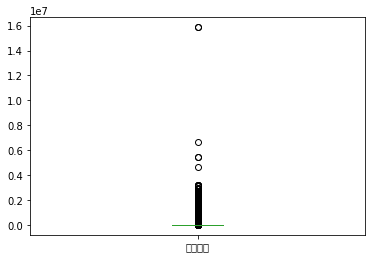

In [467]:
df_IT_Q['학습시간'].plot(kind='box')

In [468]:
drop_index = df_IT_Q[df_IT_Q['학습시간'] > 0.4 * 1e7].index
drop_index

Int64Index([2796, 3028, 3162, 3809, 3984, 3985], dtype='int64')

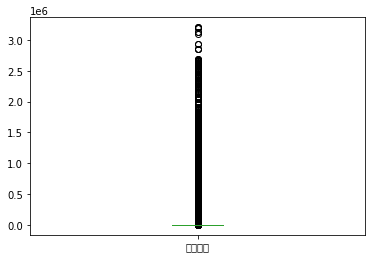

In [469]:
df_IT_Q.drop(drop_index, axis=0, inplace=True)
df_IT_Q['학습시간'].plot(kind='box')

In [470]:
drop_index = df_IT_Q[df_IT_Q['학습시간'] > 2000 ].index
len(drop_index)

4839

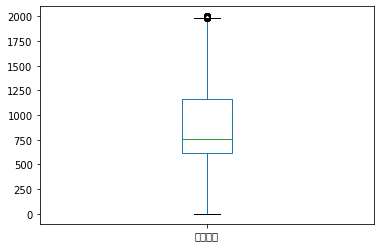

In [471]:
df_IT_Q.drop(drop_index, axis=0, inplace=True)
df_IT_Q['학습시간'].plot(kind='box')

#### 경력개월수 이상치 제거

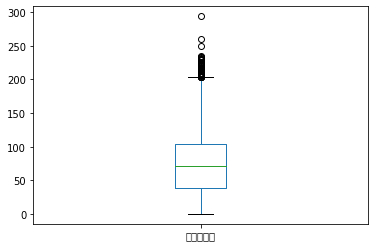

In [472]:
df_IT_Q['경력개월수'].plot(kind='box')

In [473]:
drop_index = df_IT_Q[df_IT_Q['경력개월수'] > 200].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

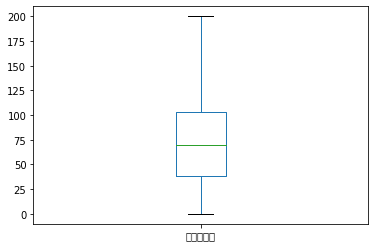

In [474]:
df_IT_Q['경력개월수'].plot(kind='box')

#### 어학점수 이상치 제거

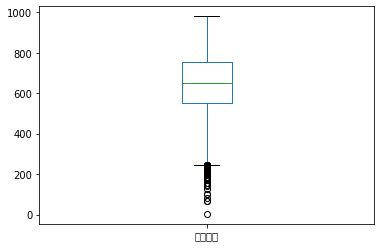

In [475]:
df_IT_Q['어학점수'].plot(kind='box')

In [476]:
drop_index = df_IT_Q[df_IT_Q['어학점수'] < 240].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

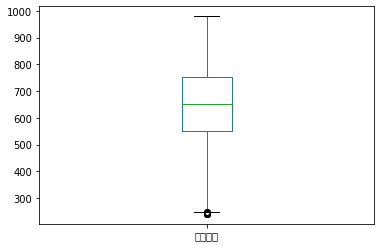

In [477]:
df_IT_Q['어학점수'].plot(kind='box')

#### 수강횟수 이상치 제거

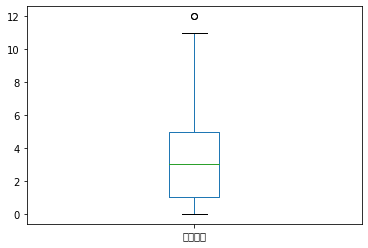

In [478]:
df_IT_Q['수강횟수'].plot(kind='box')

In [479]:
drop_index = df_IT_Q[df_IT_Q['수강횟수'] > 10].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

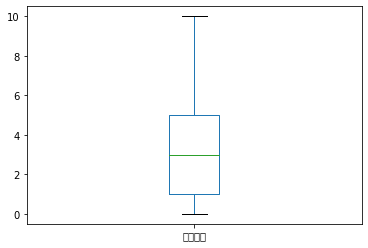

In [480]:
df_IT_Q['수강횟수'].plot(kind='box')

#### 학습지수, 학습시간 컬럼은 큰 이상치 없어 넘어감

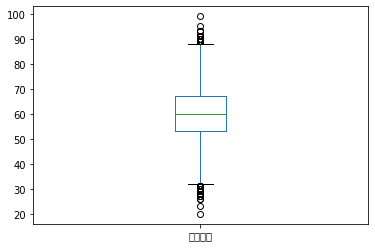

In [481]:
df_IT_Q['학습지수'].plot(kind='box')

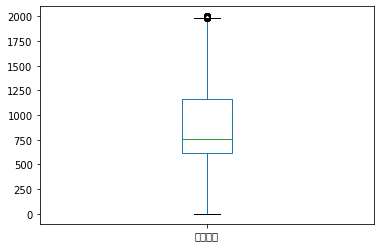

In [482]:
df_IT_Q['학습시간'].plot(kind='box')

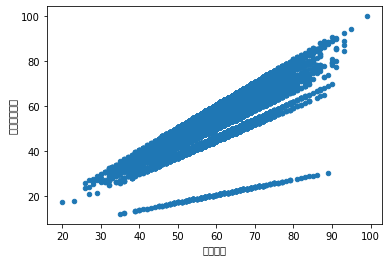

In [483]:
df_IT_Q.plot(kind='scatter', x='학습지수', y='과정코드비율')

In [484]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   교육분야1차      16566 non-null  object        
 1   교육분야2차      16566 non-null  object        
 2   과정코드        16566 non-null  object        
 3   과정명(학습명)    16566 non-null  object        
 4   과정등록일(생성일)  9882 non-null   object        
 5   학습시작일       16566 non-null  datetime64[ns]
 6   학습종료일       16566 non-null  datetime64[ns]
 7   사번(ID)      16566 non-null  object        
 8   소속부서        16566 non-null  object        
 9   호칭          16566 non-null  object        
 10  직무          16566 non-null  object        
 11  제작/소싱       8 non-null      object        
 12  자격증보유여부     16566 non-null  object        
 13  학습지수        16542 non-null  float64       
 14  과정코드비율      16566 non-null  float64       
 15  경력개월수       16566 non-null  float64       
 16  어학점수        16566 non-

### 카테고리형 컬럼 시각화를 통한 분포 확인
- 교육분야2차 : 불평균 --> 컬럼 삭제 해야

In [485]:
print(df_IT_Q['교육분야1차'].value_counts())

IT    16566
Name: 교육분야1차, dtype: int64


 it      15597
 연구개발      969
Name: 교육분야2차, dtype: int64


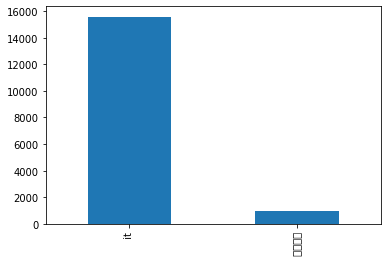

In [486]:
print(df_IT_Q['교육분야2차'].value_counts())
df_IT_Q['교육분야2차'].value_counts().plot(kind='bar')

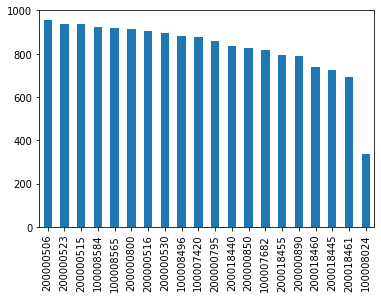

In [487]:
df_IT_Q['과정코드'].value_counts().plot(kind='bar')

대리    4062
사원    3999
과장    3437
차장    2572
부장    1652
임원     844
Name: 호칭, dtype: int64


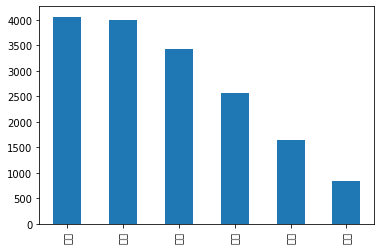

In [488]:
print(df_IT_Q['호칭'].value_counts())
df_IT_Q['호칭'].value_counts().plot(kind='bar')

제조     1932
경영     1885
마케팅    1858
IT     1851
영업     1845
회계     1822
연구     1795
HR     1791
유통     1787
Name: 직무, dtype: int64


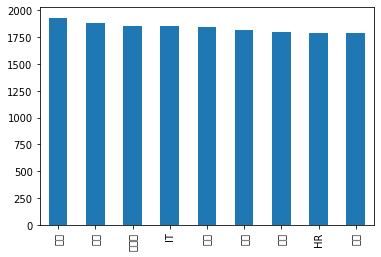

In [489]:
print(df_IT_Q['직무'].value_counts())
df_IT_Q['직무'].value_counts().plot(kind='bar')

N    10817
Y     5749
Name: 자격증보유여부, dtype: int64


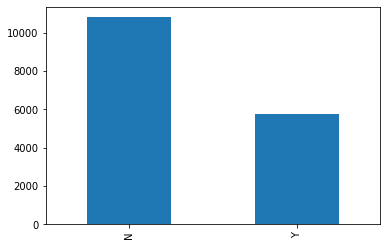

In [490]:
print(df_IT_Q['자격증보유여부'].value_counts())
df_IT_Q['자격증보유여부'].value_counts().plot(kind='bar')

1    3262
2    3159
4    3131
3    3043
0    2882
6     563
5     526
Name: 학습요일, dtype: int64


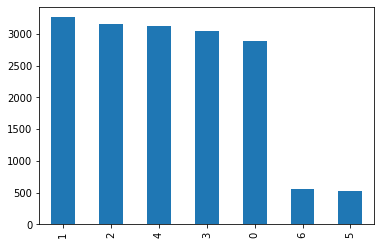

In [491]:
print(df_IT_Q['학습요일'].value_counts())
df_IT_Q['학습요일'].value_counts().plot(kind='bar')

### NULL 처리

In [492]:
df_IT_Q.isnull().sum()

교육분야1차            0
교육분야2차            0
과정코드              0
과정명(학습명)          0
과정등록일(생성일)     6684
학습시작일             0
학습종료일             0
사번(ID)            0
소속부서              0
호칭                0
직무                0
제작/소싱         16558
자격증보유여부           0
학습지수             24
과정코드비율            0
경력개월수             0
어학점수              0
수강횟수              0
학습시작일_TIME        0
학습종료일_TIME        0
학습요일              0
학습요일_CONV         0
학습시간              0
dtype: int64

In [493]:
df_IT_Q['학습지수'] = df_IT_Q['학습지수'].fillna(method='ffill')

In [494]:
df_IT_Q.isnull().sum()

교육분야1차            0
교육분야2차            0
과정코드              0
과정명(학습명)          0
과정등록일(생성일)     6684
학습시작일             0
학습종료일             0
사번(ID)            0
소속부서              0
호칭                0
직무                0
제작/소싱         16558
자격증보유여부           0
학습지수              0
과정코드비율            0
경력개월수             0
어학점수              0
수강횟수              0
학습시작일_TIME        0
학습종료일_TIME        0
학습요일              0
학습요일_CONV         0
학습시간              0
dtype: int64

### 불필요한 컬럼 삭제

In [495]:
drop_col = ['교육분야1차', '교육분야2차', '과정명(학습명)', '학습시작일', '학습종료일', '사번(ID)', '학습시작일_TIME','학습종료일_TIME' , '과정등록일(생성일)', '제작/소싱','학습요일_CONV']
df_IT_Q.drop(drop_col, axis=1, inplace=True)

In [496]:
df_IT_Q.isnull().sum()

과정코드       0
소속부서       0
호칭         0
직무         0
자격증보유여부    0
학습지수       0
과정코드비율     0
경력개월수      0
어학점수       0
수강횟수       0
학습요일       0
학습시간       0
dtype: int64

In [497]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   과정코드     16566 non-null  object 
 1   소속부서     16566 non-null  object 
 2   호칭       16566 non-null  object 
 3   직무       16566 non-null  object 
 4   자격증보유여부  16566 non-null  object 
 5   학습지수     16566 non-null  float64
 6   과정코드비율   16566 non-null  float64
 7   경력개월수    16566 non-null  float64
 8   어학점수     16566 non-null  float64
 9   수강횟수     16566 non-null  float64
 10  학습요일     16566 non-null  int64  
 11  학습시간     16566 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


# Dummy로 만들기



In [498]:
cat_col = ['소속부서', '호칭', '직무', '자격증보유여부']
df_IT_Q = pd.get_dummies(data=df_IT_Q, columns=cat_col, drop_first=True)

In [499]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   과정코드       16566 non-null  object 
 1   학습지수       16566 non-null  float64
 2   과정코드비율     16566 non-null  float64
 3   경력개월수      16566 non-null  float64
 4   어학점수       16566 non-null  float64
 5   수강횟수       16566 non-null  float64
 6   학습요일       16566 non-null  int64  
 7   학습시간       16566 non-null  float64
 8   소속부서_강북    16566 non-null  uint8  
 9   소속부서_강원    16566 non-null  uint8  
 10  소속부서_기타    16566 non-null  uint8  
 11  소속부서_대구    16566 non-null  uint8  
 12  소속부서_부산    16566 non-null  uint8  
 13  소속부서_전남    16566 non-null  uint8  
 14  소속부서_충남    16566 non-null  uint8  
 15  호칭_대리      16566 non-null  uint8  
 16  호칭_부장      16566 non-null  uint8  
 17  호칭_사원      16566 non-null  uint8  
 18  호칭_임원      16566 non-null  uint8  
 19  호칭_차장      16566 non-null  uint8  
 20  직무_IT 

In [500]:
len(df_IT_Q['과정코드'].unique())

20

In [501]:
과정코드_TO_과정명

{'100007420': '개발 보안 가이드 (2편)',
 '100007682': 'RPA 시작하기',
 '100008024': 'RPA실습하기',
 '100008496': '쉬운우리보안1 피싱메일 예방법',
 '100008565': '개발 보안 가이드 (1편 개요보안은 왜 필요한가요)',
 '100008584': '웹스크래핑하기',
 '200000506': '1 AI 분석 시작하기',
 '200000515': '1 텍스트 감정 분석하기',
 '200000516': '1 전환 가입자 예측 모델 만들기',
 '200000523': 'K에듀 스마트팩토리 경쟁력',
 '200000530': '[인프라] 클라우드 개요',
 '200000795': 'K에듀 시큐어코딩 가이드(22)',
 '200000800': 'K에듀 시큐어코딩 가이드(12)',
 '200000850': 'K에듀 시큐어코딩 가이드(사례심화)',
 '200000890': 'K에듀 임직원 정보보안 생활백서',
 '200018440': '[클라우드 ] 클라우드 이해 1-1 클라우드 중요성',
 '200018445': '[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식',
 '200018455': '[클라우드 ] 클라우드 이해 1-3 클라우드 사용이유',
 '200018460': '[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유',
 '200018461': '[클라우드 ] K에듀 클라우드2-2 K에듀 클라우드 개요'}

# X, y 분리

In [502]:
X = df_IT_Q.drop('과정코드', axis=1).values
y = df_IT_Q['과정코드'].values

In [503]:
X.shape, y.shape

((16566, 28), (16566,))

In [504]:
y[:4]

array(['200000890', '100008024', '200000850', '200000800'], dtype=object)

# '과정코드' 라벨 인코딩

In [505]:
from sklearn.preprocessing import LabelEncoder

In [506]:
le = LabelEncoder()
y = le.fit_transform(y)

In [507]:
print(y[:3])
print(le.classes_)

[14  2 13]
['100007420' '100007682' '100008024' '100008496' '100008565' '100008584'
 '200000506' '200000515' '200000516' '200000523' '200000530' '200000795'
 '200000800' '200000850' '200000890' '200018440' '200018445' '200018455'
 '200018460' '200018461']


# Train/Test 데이터셋 나누기

In [508]:
from sklearn.model_selection import train_test_split

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=41)

In [510]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11596, 28), (4970, 28), (11596,), (4970,))

# 스케일링

In [511]:
from sklearn.preprocessing import StandardScaler

In [512]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [513]:
X_train[0]

array([-0.20881462, -0.1200644 , -0.40256208, -0.88873638, -1.45985347,
        1.08325617,  0.37421753, -0.41547086, -0.01608654,  1.24171961,
       -0.29631888, -0.2402908 , -0.30653265, -0.32697253, -0.56938369,
       -0.33195823,  1.76080218, -0.23028907, -0.42527097, -0.35625741,
       -0.35947723, -0.35579613, -0.34649938, -0.34992428, -0.34649938,
       -0.36813969, -0.35162965, -0.72649827])

## 램덤포레스트 머신러닝 모델링

In [514]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [515]:
rf = RandomForestClassifier(n_estimators=500, random_state=41)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.33682092555331994

In [516]:
y_pred = rf.predict(X_test)

In [517]:
y_pred[:3]

array([17,  8, 16])

In [518]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.29      0.30       264
           1       0.29      0.30      0.29       245
           2       0.95      1.00      0.98       101
           3       0.18      0.17      0.18       265
           4       0.22      0.21      0.22       276
           5       0.17      0.16      0.17       277
           6       0.40      0.51      0.45       287
           7       0.22      0.26      0.24       281
           8       0.35      0.33      0.34       272
           9       0.20      0.23      0.22       282
          10       0.33      0.28      0.30       269
          11       0.30      0.25      0.27       258
          12       0.36      0.31      0.33       274
          13       0.25      0.24      0.24       248
          14       0.38      0.36      0.37       237
          15       0.33      0.30      0.32       250
          16       0.37      0.41      0.38       217
          17       0.53    

# 딥러닝 : IT 분야 과정명 20개중에서 추천 3개 모델링 만들기

In [519]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [520]:
tf.random.set_seed(41)

EPOCHS = 100
BATCH_SIZE = 32
RECOMMAND_COUNT = 20

In [521]:
model = Sequential()

In [522]:
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(RECOMMAND_COUNT, activation='softmax'))

In [523]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1856      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 20)                660       
                                                                 
Total params: 4,596
Trainable params: 4,596
Non-trainable params: 0
_________________________________________________________________


In [524]:
mc = ModelCheckpoint('best_model.ht5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [525]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [526]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[mc, es])

Epoch 1/100
363/363 [==============================] - 3s 6ms/step - loss: 3.0172 - accuracy: 0.0581 - val_loss: 2.9564 - val_accuracy: 0.0610
Epoch 2/100
363/363 [==============================] - 3s 8ms/step - loss: 2.8885 - accuracy: 0.0792 - val_loss: 2.6870 - val_accuracy: 0.1223
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 2.5623 - accuracy: 0.1248 - val_loss: 2.2322 - val_accuracy: 0.2314
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 2.2495 - accuracy: 0.1807 - val_loss: 1.9521 - val_accuracy: 0.3264
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 2.0332 - accuracy: 0.2220 - val_loss: 1.7605 - val_accuracy: 0.3956
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 1.8757 - accuracy: 0.2530 - val_loss: 1.6373 - val_accuracy: 0.4674
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 1.7728 - accuracy: 0.2787 - val_loss: 1.5418 - val_accuracy: 0.4483

Text(0, 0.5, 'Loss')

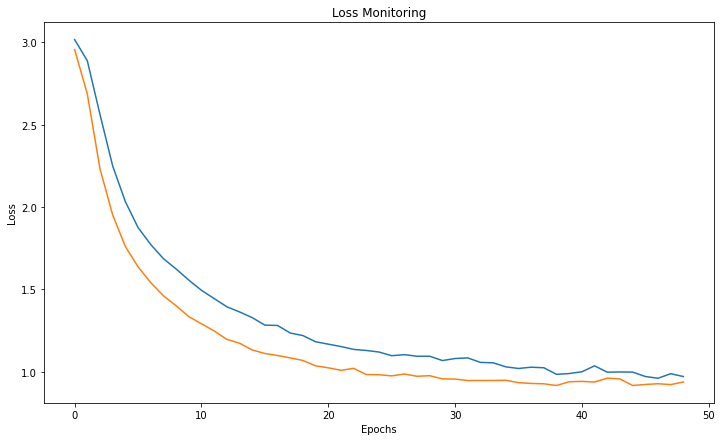

In [541]:
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Loss Monitoring')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

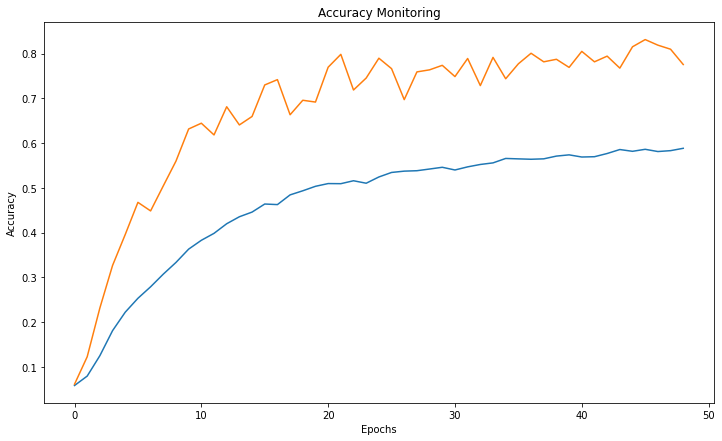

In [542]:
plt.figure(figsize=(12,7))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.title('Accuracy Monitoring')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

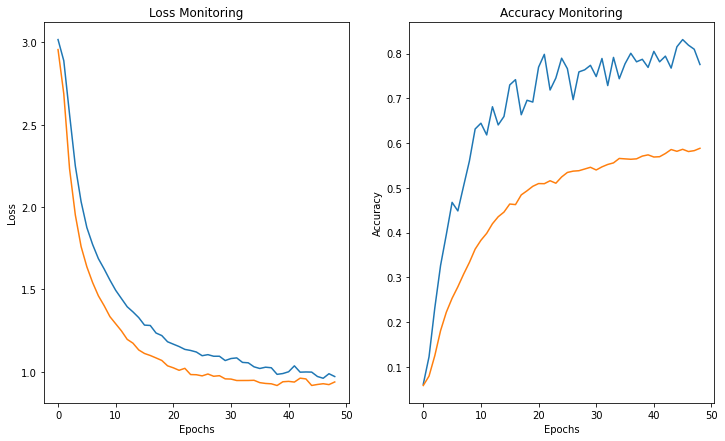

In [543]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['loss'], label='Loss')
ax1.plot(history.history['val_loss'], label='validation Loss')
ax1.set_title('Loss Monitoring')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['val_accuracy'], label='validation Accuracy')
ax2.plot(history.history['accuracy'], label='Accuracy')
ax2.set_title('Accuracy Monitoring')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

### IT분야 과정명 3개 추천하기

In [527]:
pred = model.predict(X_test[:20])

In [528]:
print(pred.shape)

(20, 20)


In [529]:
# 3개 추천
top3 = np.argsort(-1 * pred, axis=1)[:, :3]
top3

array([[15, 13,  1],
       [12, 10,  8],
       [13, 15,  1],
       [11,  0, 15],
       [18, 16, 19],
       [ 4,  9,  5],
       [ 9,  5,  7],
       [18, 16, 19],
       [10,  8, 12],
       [ 4,  9,  5],
       [ 0, 11, 12],
       [ 8, 10, 12],
       [ 3,  7,  9],
       [ 9,  5,  4],
       [ 6,  3,  7],
       [ 1, 13, 14],
       [13, 15,  1],
       [ 3,  7,  9],
       [ 4,  9,  5],
       [ 0, 11, 12]])

In [530]:
고객별_추천리스트 = []
for num3 in top3:
  for idx in num3:
    code = le.classes_[idx]
    #print(code, type(code))
    추천과정명 = 과정코드_TO_과정명.get(code)
    고객별_추천리스트.append(추천과정명)
  print(고객별_추천리스트)
  고객별_추천리스트.clear()

['[클라우드 ] 클라우드 이해 1-1 클라우드 중요성', 'K에듀 시큐어코딩 가이드(사례심화)', 'RPA 시작하기']
['K에듀 시큐어코딩 가이드(12)', '[인프라] 클라우드 개요', '1 전환 가입자 예측 모델 만들기']
['K에듀 시큐어코딩 가이드(사례심화)', '[클라우드 ] 클라우드 이해 1-1 클라우드 중요성', 'RPA 시작하기']
['K에듀 시큐어코딩 가이드(22)', '개발 보안 가이드 (2편)', '[클라우드 ] 클라우드 이해 1-1 클라우드 중요성']
['[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유', '[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식', '[클라우드 ] K에듀 클라우드2-2 K에듀 클라우드 개요']
['개발 보안 가이드 (1편 개요보안은 왜 필요한가요)', 'K에듀 스마트팩토리 경쟁력', '웹스크래핑하기']
['K에듀 스마트팩토리 경쟁력', '웹스크래핑하기', '1 텍스트 감정 분석하기']
['[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유', '[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식', '[클라우드 ] K에듀 클라우드2-2 K에듀 클라우드 개요']
['[인프라] 클라우드 개요', '1 전환 가입자 예측 모델 만들기', 'K에듀 시큐어코딩 가이드(12)']
['개발 보안 가이드 (1편 개요보안은 왜 필요한가요)', 'K에듀 스마트팩토리 경쟁력', '웹스크래핑하기']
['개발 보안 가이드 (2편)', 'K에듀 시큐어코딩 가이드(22)', 'K에듀 시큐어코딩 가이드(12)']
['1 전환 가입자 예측 모델 만들기', '[인프라] 클라우드 개요', 'K에듀 시큐어코딩 가이드(12)']
['쉬운우리보안1 피싱메일 예방법', '1 텍스트 감정 분석하기', 'K에듀 스마트팩토리 경쟁력']
['K에듀 스마트팩토리 경쟁력', '웹스크래핑하기', '개발 보안 가이드 (1편 개요보안은 왜 필요한가요)']
['1 AI 분석 시작하기', '쉬운우리보안1 피싱메일 예방법', '1 텍스트